In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')
from ipywidgets import widgets
# ! pip install plotly

In [2]:
df=pd.read_csv('anomaly_detection_data.csv')
df['datetime']=df['date']+' '+df['time']
# df.isnull().sum()
# df.duplicated().sum()
import re
df['datetime']=df['datetime'].apply(lambda i: re.sub('\.',':',i))
df['datetime']=pd.to_datetime(df['datetime'])
df=df.sort_values(by='datetime')

df.drop(['date','time','timestamp'], axis=1, inplace=True)
df.set_index('datetime',inplace=True)
df.head(2)


,input current,input current (Min),input current (Max),input current (StdDev),current data 0x1,current data 0x2,current data 0x3,current data 0x4,current data 0x5,current data 0x6,...,Engineering Sensors 12,Engineering Sensors 13,motor fault counters 1,motor fault counters 2,motor fault counters 3,motor fault counters 4,motor fault counters 5,motor fault counters 6,motor fault counters 7,motor fault counters 8
datetime,,,,,,,,,,,,,,,,,,,,,
2014-09-21 12:39:19,1.14,1.01,1.32,0.09,0.34,0.31,0.0,0.06,0.59,0,...,25.6,33.9,0,0,0,0,0,0,0,0
2014-09-21 12:39:29,1.16,1.01,1.27,0.08,0.37,0.30,0.0,0.06,0.61,0,...,25.6,33.9,0,0,0,0,0,0,0,0


In [3]:
# Adding more features :
# the hours and if it's night or day (6:00-19:00)
df['hours'] = df.index.hour
df['month']=df.index.month
df['year']  =df.index.year
df['daylight'] = ((df['hours'] >= 6) & (df['hours'] <= 19)).astype(int)
df['night']=((df['hours'] <= 23) & (df['hours'] > 19)).astype(int)
# the day of the week (Monday=0, Sunday=6) and if it's a week end day or week day.
df['Date']=df.index.date
df['DayOfTheWeek'] = df.index.dayofweek
df['WeekDay'] = (df['DayOfTheWeek'] < 5).astype(int)
df['weekend']=(df['DayOfTheWeek']>=5).astype(int)
df['quarter'] = df.index.quarter
print("Time period from {} to {}".format(df.index.min(), df.index.max()))

Time period from 2014-09-21 12:39:19 to 2017-10-08 23:59:59


In [4]:
df.head(3)

,input current,input current (Min),input current (Max),input current (StdDev),current data 0x1,current data 0x2,current data 0x3,current data 0x4,current data 0x5,current data 0x6,...,hours,month,year,daylight,night,Date,DayOfTheWeek,WeekDay,weekend,quarter
datetime,,,,,,,,,,,,,,,,,,,,,
2014-09-21 12:39:19,1.14,1.01,1.32,0.09,0.34,0.31,0.0,0.06,0.59,0,...,12,9,2014,1,0,2014-09-21,6,0,1,3
2014-09-21 12:39:29,1.16,1.01,1.27,0.08,0.37,0.30,0.0,0.06,0.61,0,...,12,9,2014,1,0,2014-09-21,6,0,1,3
2014-09-21 12:39:39,1.15,0.96,1.25,0.09,0.36,0.31,0.0,0.06,0.59,0,...,12,9,2014,1,0,2014-09-21,6,0,1,3


### Select 13 engg. sensor features for further exploration

In [5]:
cols=['Engineering Sensors 1', 'Engineering Sensors 2',
       'Engineering Sensors 3', 'Engineering Sensors 4',
       'Engineering Sensors 5', 'Engineering Sensors 6',
       'Engineering Sensors 7', 'Engineering Sensors 8',
       'Engineering Sensors 9', 'Engineering Sensors 10',
       'Engineering Sensors 11', 'Engineering Sensors 12',
       'Engineering Sensors 13','month','year','hours','daylight','night','Date','DayOfTheWeek','WeekDay','weekend','quarter']
df1=df[cols]
col=['Engineering Sensors 1', 'Engineering Sensors 2',
       'Engineering Sensors 3', 'Engineering Sensors 4',
       'Engineering Sensors 5', 'Engineering Sensors 6',
       'Engineering Sensors 7', 'Engineering Sensors 8',
       'Engineering Sensors 9', 'Engineering Sensors 10',
       'Engineering Sensors 11', 'Engineering Sensors 12',
       'Engineering Sensors 13']#,'year','hours','daylight']

In [7]:
temp_df1 = df1[col].groupby(df['month']).mean().reset_index()
temp_df1

,month,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,6,25.715846,24.564234,26.318927,19.415327,19.114046,21.073255,20.738604,23.773244,23.849492,23.544943,20.582553,26.285280,33.901104
1,7,25.829625,24.680158,26.372024,19.463787,19.175954,21.137851,20.800642,23.829144,23.908684,23.606370,20.702853,26.350304,33.900676
2,8,25.625683,24.472063,26.250937,19.428714,19.059540,20.989571,20.672460,23.739698,23.812476,23.492302,20.487238,26.154254,33.901222
3,9,26.298106,25.263488,26.266806,19.479540,19.122279,21.146014,20.807758,23.762269,23.840278,23.387212,20.840974,26.278470,33.901156
4,10,25.602488,24.451088,26.361354,19.440961,19.101516,21.034896,20.720336,23.802292,23.882373,23.594641,20.406435,26.336157,33.901076


# **INSIGHT 1 :**

1. highest sensor values averages in the month of september
2. around 98% values recorded from the engineering sensors are from 2017 and rest from 2014

In [8]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
import datetime

In [10]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom,tap"
p = figure(plot_height=350,
    title="Average Number of Sensor3 readings by Month",
    tools=TOOLS,
    toolbar_location='above')

p.vbar(x=temp_df1['month'], top=temp_df1['Engineering Sensors 2'], width=0.9)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = 'Month'
p.yaxis.axis_label = 'Average Sensor values'
p.select_one(HoverTool).tooltips = [
    ('month', '@x'),
    ('Number of crimes', '@top'),
]
output_file("barchart.html", title="barchart")
show(p)


In [11]:
temp_df2 = df1[col].groupby(df['year']).mean().reset_index()
temp_df2
# sns.lineplot(data=temp_df1)

,year,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,2014,30.088889,30.333844,25.338442,19.575351,19.208174,21.200511,20.897573,23.375862,23.442401,21.239208,20.373946,25.579949,33.900000
1,2017,25.751278,24.599852,26.335454,19.444479,19.116274,21.080171,20.750442,23.791075,23.868874,23.568324,20.619035,26.301516,33.901058


# **INSIGHT 2 :**
1. Significant average decrease in sensor 1,2 value from 2014 to 2017 by 14%
2. Slight average increase in sensor 10 value from 2014 to 2017 by approximate 9 %

In [14]:
TOOLS = 'save,pan,box_zoom,reset,wheel_zoom,hover'
p = figure(title="Year-wise average sensor value", y_axis_type="linear", plot_height = 400,
           tools = TOOLS, plot_width = 500)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Average Sensor Values 1'
p.circle(2017, df['Engineering Sensors 1'].min(), size = 10, color = 'red')

p.line(df.year, df['Engineering Sensors 1'],line_color="purple", line_width = 3)
p.select_one(HoverTool).tooltips = [
    ('year', '@x'),
    ('Sensor1 value', '@y'),
]

output_file("line_chart.html", title="Line Chart")
show(p)

In [ ]:
# df.columns

In [15]:
temp_df3 = df1[col].groupby(df['night']).mean().reset_index()
temp_df3

,night,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,0,25.861414,24.740832,26.305589,19.440820,19.115196,21.085621,20.754233,23.774703,23.852314,23.507815,20.634353,26.277617,33.901030
1,1,25.689597,24.540653,26.371667,19.476431,19.131486,21.066861,20.748083,23.825208,23.902694,23.608083,20.518194,26.338792,33.901083


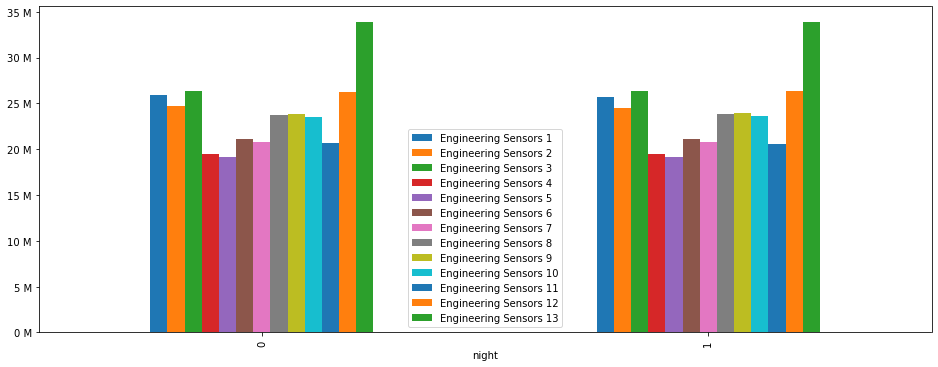

In [16]:
df1[col].groupby(df['night']).mean().plot(kind="bar", figsize=(16,6))

y = plt.yticks()[0][:-1]
plt.yticks(y, [str(i)[:-2]+" M" for i in y])
plt.show()

In [19]:
temp_df4 = df1[col].groupby(df['daylight']).mean().reset_index()
temp_df4

,daylight,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,0,25.691900,24.540915,26.364580,19.501894,19.119768,21.054165,20.735273,23.812128,23.891583,23.603005,20.526779,26.338091,33.901034
1,1,25.939583,24.833763,26.280288,19.404702,19.116615,21.104097,20.766930,23.761249,23.837407,23.465064,20.681805,26.249693,33.901042


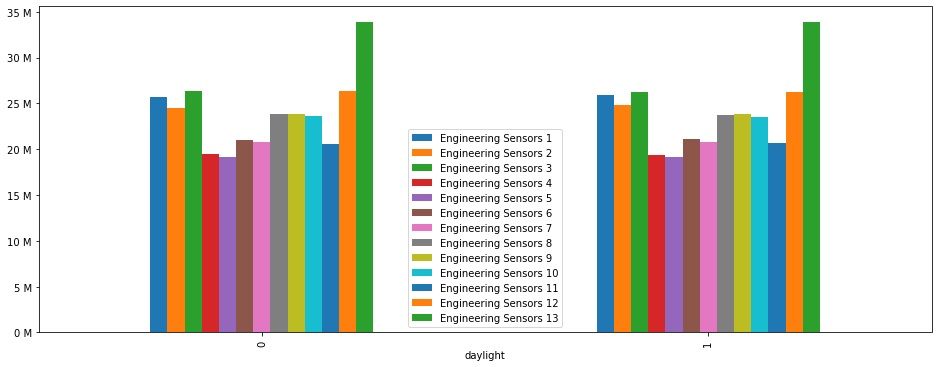

In [18]:
df1[col].groupby(df['daylight']).mean().plot(kind="bar", figsize=(16,6))

y = plt.yticks()[0][:-1]
plt.yticks(y, [str(i)[:-2]+" M" for i in y])
plt.show()

# **INSIGHT 3 :**

No Significant average changes in all the sensor value in the day and night hours


In [20]:
temp_df5 = df1[col].groupby(df['DayOfTheWeek']).mean().reset_index()
temp_df5

,DayOfTheWeek,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,1,25.625683,24.472063,26.250937,19.428714,19.059540,20.989571,20.672460,23.739698,23.812476,23.492302,20.487238,26.154254,33.901222
1,3,25.715846,24.564234,26.318927,19.415327,19.114046,21.073255,20.738604,23.773244,23.849492,23.544943,20.582553,26.285280,33.901104
2,4,25.951437,24.799801,26.351705,19.470778,19.114424,21.141030,20.799544,23.797606,23.876664,23.583649,20.883684,26.342350,33.901261
3,5,25.829625,24.680158,26.372024,19.463787,19.175954,21.137851,20.800642,23.829144,23.908684,23.606370,20.702853,26.350304,33.900676
4,6,25.975284,24.939913,26.276356,19.452128,19.110379,21.048658,20.735063,23.766858,23.845813,23.398918,20.403736,26.273321,33.900987


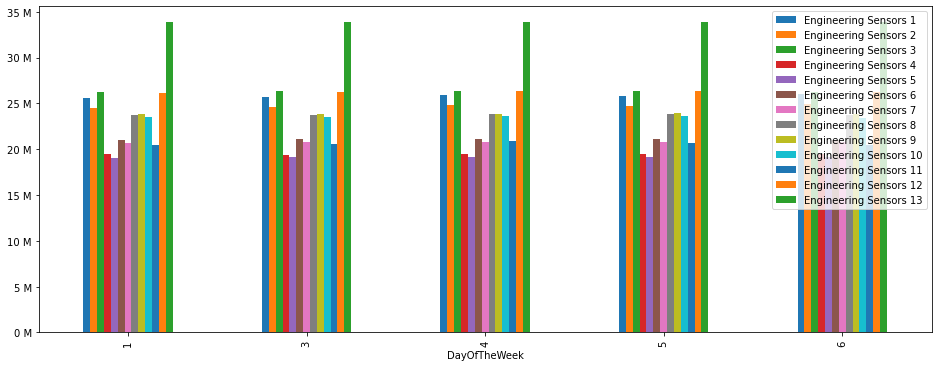

In [21]:
df1[col].groupby(df['DayOfTheWeek']).mean().plot(kind="bar", figsize=(16,6))

y = plt.yticks()[0][:-1]
plt.yticks(y, [str(i)[:-2]+" M" for i in y])
plt.show()

# **INSIGHT 4 :**
1. Slight variations in average sensor 1 values on weekly basis
2. No major variations in average sensor values for other 12 sensors on weekly basis

In [22]:
temp_df6 = df1[col].groupby(df['quarter']).mean().reset_index()
temp_df6


,quarter,Engineering Sensors 1,Engineering Sensors 2,Engineering Sensors 3,Engineering Sensors 4,Engineering Sensors 5,Engineering Sensors 6,Engineering Sensors 7,Engineering Sensors 8,Engineering Sensors 9,Engineering Sensors 10,Engineering Sensors 11,Engineering Sensors 12,Engineering Sensors 13
0,2,25.715846,24.564234,26.318927,19.415327,19.114046,21.073255,20.738604,23.773244,23.849492,23.544943,20.582553,26.285280,33.901104
1,3,25.956527,24.850021,26.300386,19.460761,19.125285,21.102654,20.770239,23.780385,23.857590,23.492861,20.700078,26.272089,33.901001
2,4,25.602488,24.451088,26.361354,19.440961,19.101516,21.034896,20.720336,23.802292,23.882373,23.594641,20.406435,26.336157,33.901076


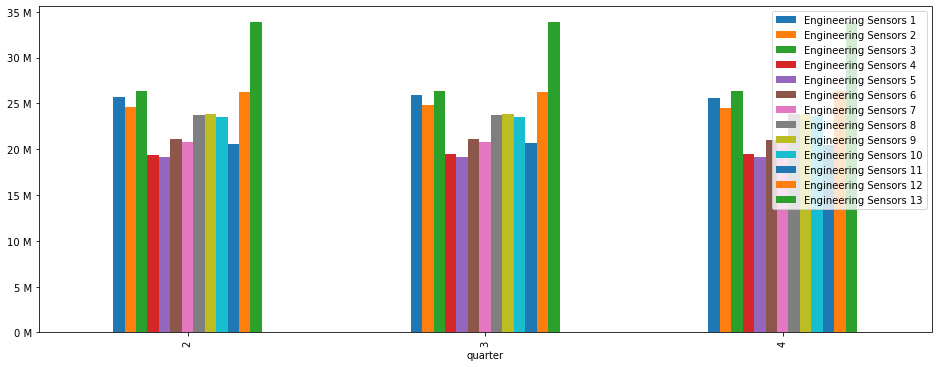

In [23]:
df1[col].groupby(df['quarter']).mean().plot(kind="bar", figsize=(16,6))

y = plt.yticks()[0][:-1]
plt.yticks(y, [str(i)[:-2]+" M" for i in y])
plt.show()

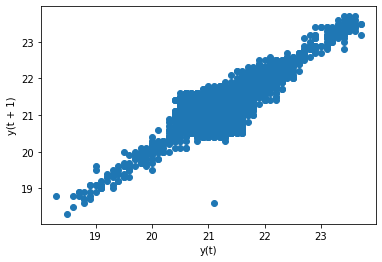

In [24]:
from pandas.plotting import lag_plot
series = df1['Engineering Sensors 6']
lag_plot(series)
plt.show()

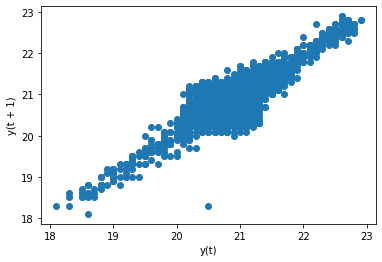

In [25]:
series = df1['Engineering Sensors 7']
lag_plot(series)
plt.show()

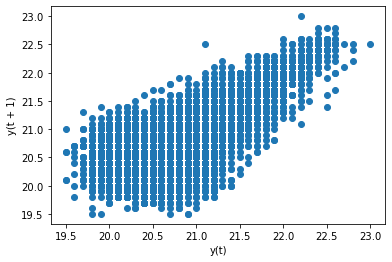

In [26]:
series = df1['Engineering Sensors 11']
lag_plot(series)
plt.show()

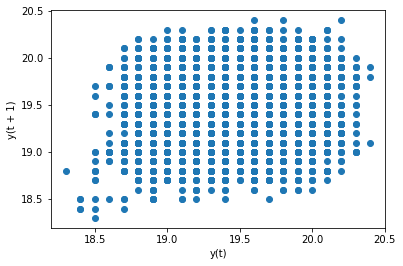

In [27]:
series = df1['Engineering Sensors 4']
lag_plot(series)
plt.show()

# **INSIGHT 5 :**

6,7 relatively strong positive correlation between observations and their lag1 values.
11,4  highly uncorrelated

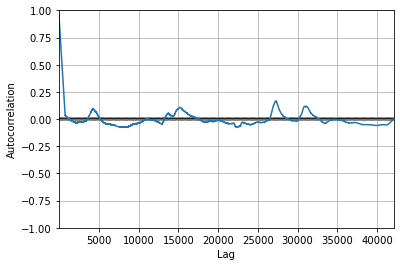

In [28]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
series = df1['Engineering Sensors 1']

autocorrelation_plot(series)
plt.show()

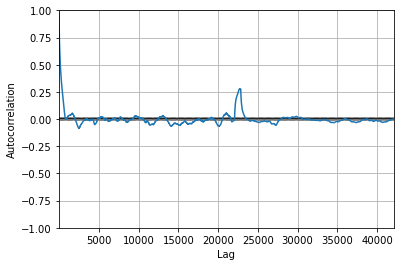

In [31]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
series = df1['Engineering Sensors 3']

autocorrelation_plot(series)
plt.show()

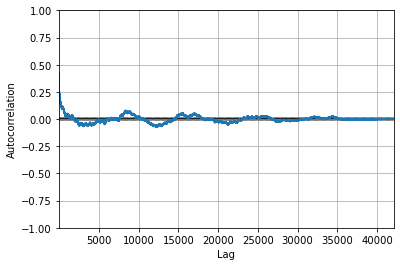

In [29]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
series = df1['Engineering Sensors 4']

autocorrelation_plot(series)
plt.show()

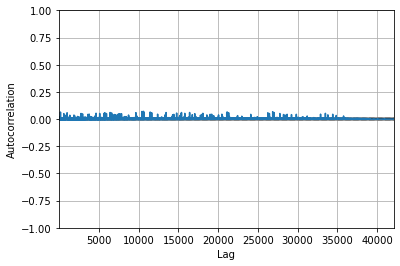

In [30]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
series = df1['Engineering Sensors 13']

autocorrelation_plot(series)
plt.show()

# **INSIGHT 6 :**
1. The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).
2. sensors 1,2,3,10 show few strong positive corelations
3. sensor 4,5 doesnt show much autocorellation